<a href="https://colab.research.google.com/github/monir383/oasis/blob/main/cleaning_data_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORTING THE LIBRARIES***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# ***DATA INTEGRITY***

In [ ]:
# Load the dataset
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()

# Overview of the dataset
df.info()
df.describe()

# Checking for inconsistent or incorrect entries
print("Unique room types:", df['room_type'].unique())
print("Unique neighbourhood groups:", df['neighbourhood_group'].unique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# *MISSING DATA HANDLING*

In [ ]:


# Print column names to avoid KeyError
print("Available columns:", df.columns)

# Handle missing values safely
if 'name' in df.columns:
    df['name'].fillna('No Name', inplace=True)

if 'host_name' in df.columns:
    df['host_name'].fillna('Unknown Host', inplace=True)

if 'reviews_per_month' in df.columns:
    df['reviews_per_month'].fillna(0, inplace=True)

# Show remaining missing values
df.isnull().sum()







Available columns: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


<ipython-input-6-c5939ac8a7db>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('No Name', inplace=True)
<ipython-input-6-c5939ac8a7db>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## ***REMOVES DUPLICATES***

In [ ]:
# Remove Duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


After removing duplicates: (48895, 16)


# ***STANDARDIZE COLUMN FORMATS***

In [ ]:
# Standardization
df.columns = df.columns.str.lower().str.replace(" ", "_")
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# ***DETECTION AND REMOVAL OF OUTLIERS***

In [ ]:
#Outlier Detection and Removal
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (48895, 16)
After outlier removal: (45923, 16)


# ***VISUALIZATION***

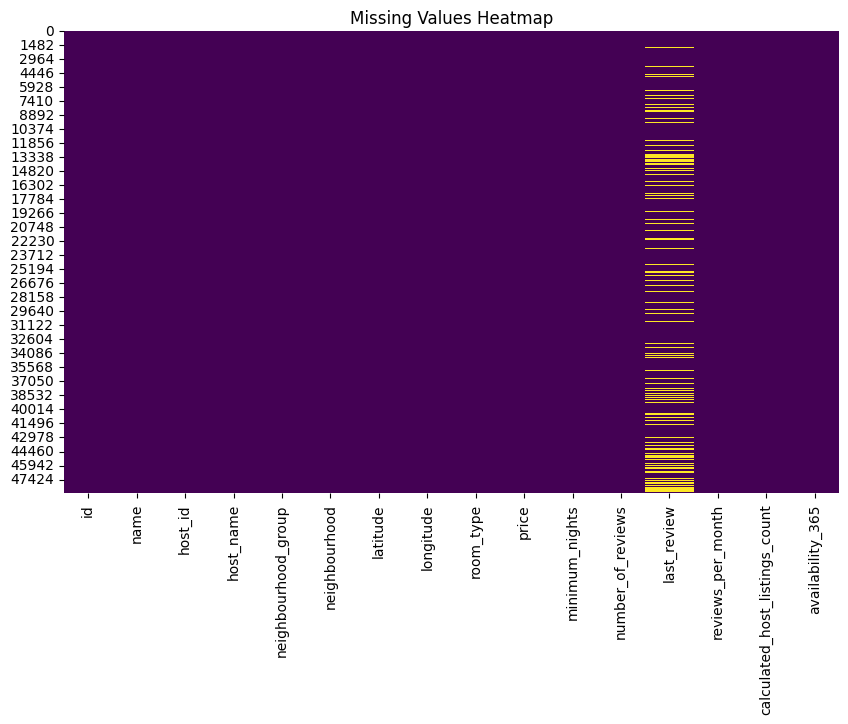

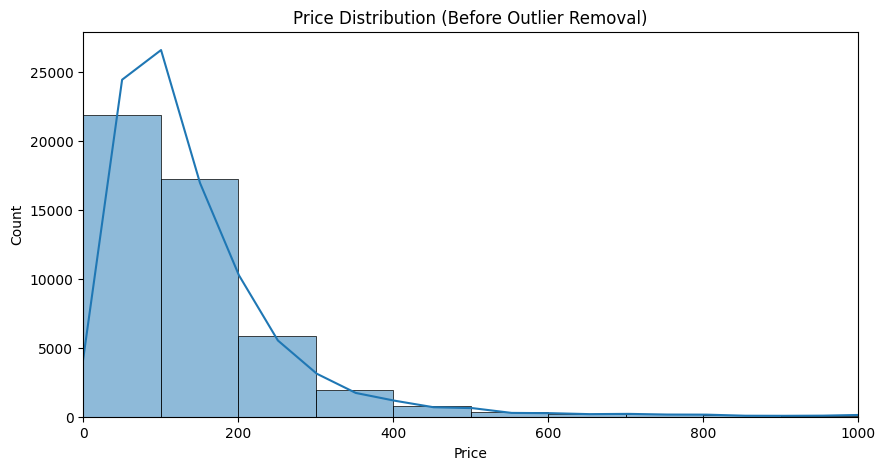

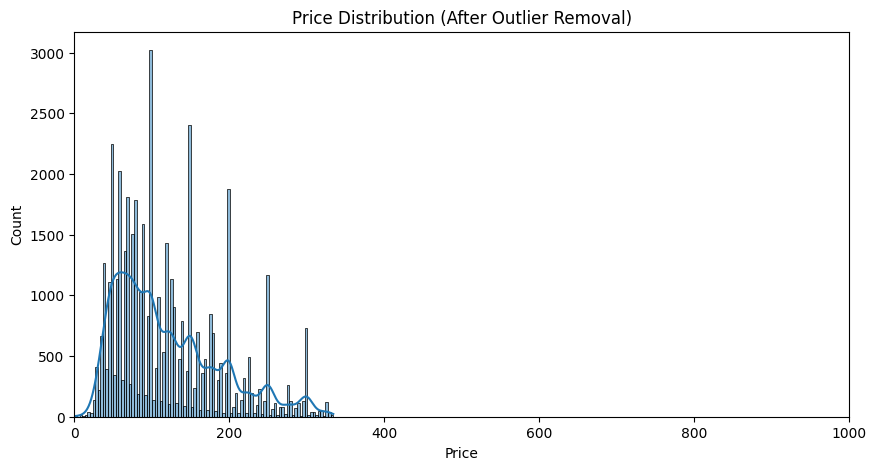

<ipython-input-10-1958604fa8c8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='neighbourhood_group', palette='Set2')


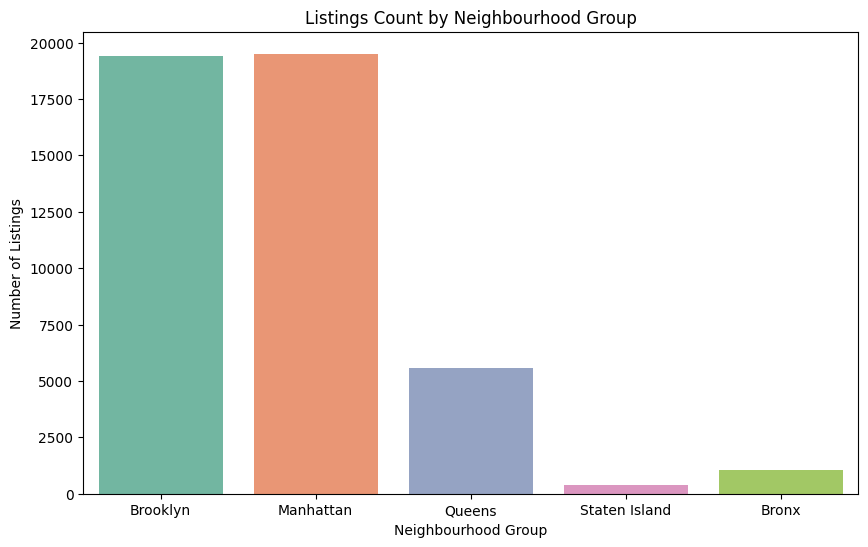

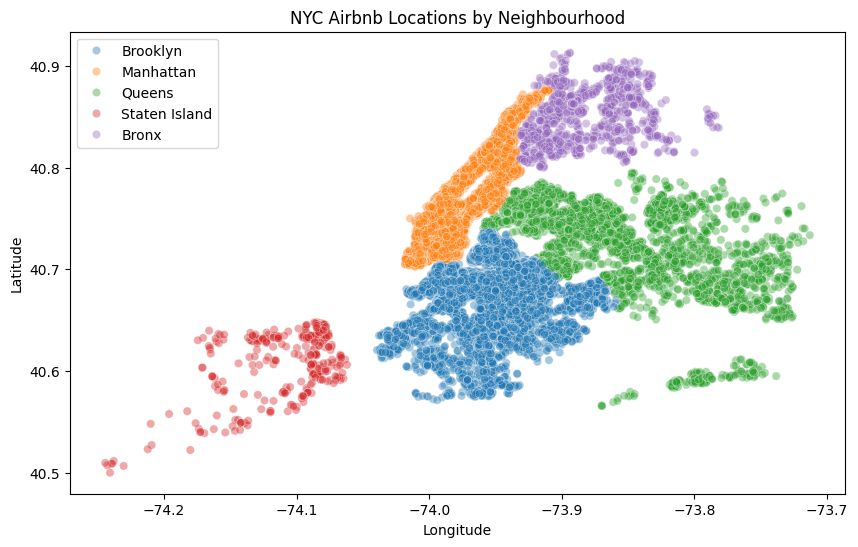

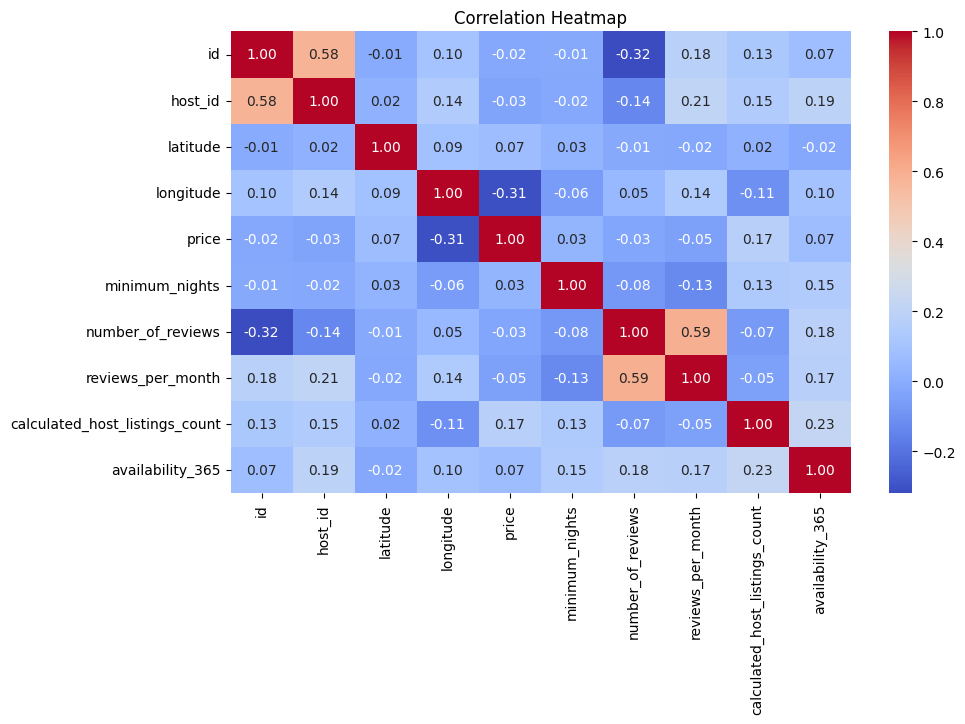

In [ ]:
# Missing Values Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


# Price Distribution (Before Cleaning)
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title('Price Distribution (Before Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


# Price Distribution (After Cleaning)
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title('Price Distribution (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


# Listings by Neighbourhood Group
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='neighbourhood_group', palette='Set2')
plt.title('Listings Count by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()


# Scatter Plot (Latitude vs Longitude)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.4, palette='tab10')
plt.title('NYC Airbnb Locations by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

